---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [178]:
# Import necessary Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns


# Load cleaned exoneration dataset
df = pd.read_csv('../../data/processed-data/illinois_exoneration_data.csv')
pd.set_option('display.max_columns', None) # Enables display of every column
df.head()

,last_name,first_name,age,race,sex,state,county,latitude,longitude,worst_crime_display,sentence,sentence_in_years,posting_date,om,date_of_exoneration,date_of_1st_conviction,date_of_release,arson,bitemark,co_defendant_confessed,conviction_integrity_unit,child_sex_abuse_hysteria_case,child_victim,female_exoneree,federal_case,homicide,innocence_organization,jailhouse_informant,juvenile_defendant,misdemeanor,no_crime_case,guilty_plea_case,posthumous_exoneration,sexual_assault,shaken_baby_syndrome_case,prosecutor_misconduct,police_officer_misconduct,forensic_analyst_misconduct,child_welfare_worker_misconduct,withheld_exculpatory_evidence,misconduct_that_is_not_withholding_evidence,knowingly_permitting_perjury,witness_tampering_or_misconduct_interrogating_co_defendant,misconduct_in_interrogation_of_exoneree,perjury_by_official,prosecutor_lied_in_court,tag_sum,geocode_address
0,Abbott,Cinque,19.0,Black,male,Illinois,Cook,41.819738,-87.756525,Drug Possession or Sale,Probation,0.0,2022-02-14,1,2022-02-01,2008-03-25,2008-03-25,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,7,"Cook County, Illinois, United States"
1,Abernathy,Christopher,17.0,White,male,Illinois,Cook,41.819738,-87.756525,Murder,Life without parole,100.0,2015-02-13,1,2015-02-11,1987-01-15,2015-02-11,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,10,"Cook County, Illinois, United States"
2,Abrego,Eruby,20.0,Hispanic,male,Illinois,Cook,41.819738,-87.756525,Murder,90 years,90.0,2022-08-25,1,2022-07-21,2004-09-22,2022-07-21,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,9,"Cook County, Illinois, United States"
3,Adams,Demetris,22.0,Black,male,Illinois,Cook,41.819738,-87.756525,Drug Possession or Sale,1 year,1.0,2020-04-13,1,2020-02-11,2004-09-08,2004-12-26,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,7,"Cook County, Illinois, United States"
4,Adams,Kenneth,22.0,Black,male,Illinois,Cook,41.819738,-87.756525,Murder,75 years,75.0,2011-08-29,1,1996-07-02,1978-10-20,1996-06-14,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,11,"Cook County, Illinois, United States"


In [179]:
import folium

# Create a Folium map centered on Illinois
illinois_map = folium.Map(location=[40.0, -89.0], zoom_start=6)  # Centered on Illinois with appropriate zoom

# Add markers for each exoneration in the dataset
for _, row in df.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=(
                f"<b>County:</b> {row['county']}<br>"
                f"<b>Worst Crime:</b> {row['worst_crime_display']}<br>"
                f"<b>Sentence:</b> {row['sentence_in_years']} years"
            ),
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(illinois_map)


source: https://clearinghouse.isgs.illinois.edu/data/reference/illinois-county-boundaries-polygons-and-lines 

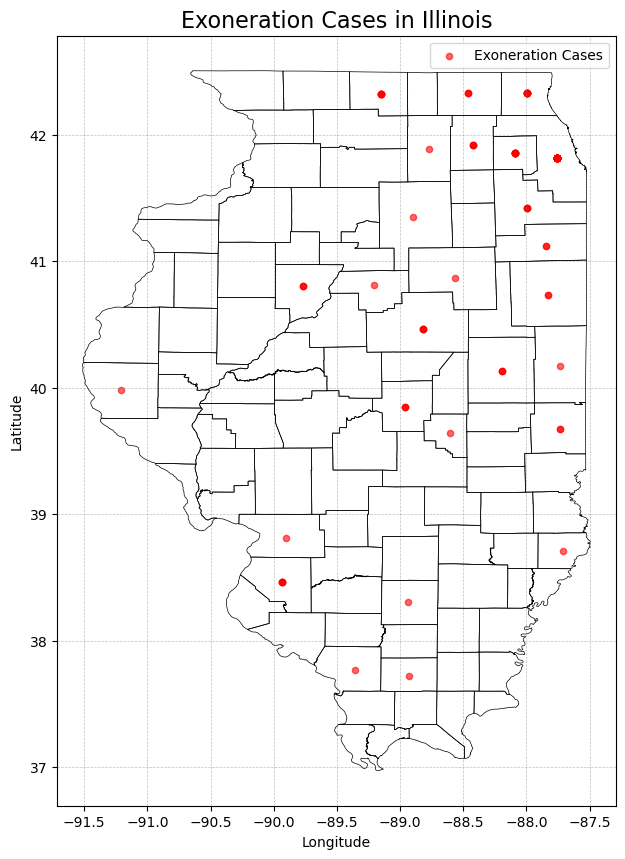

In [180]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create geometry column for points based on latitude and longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load Illinois county shapefile 
illinois_counties = gpd.read_file('../../data/geospatial/IL_BNDY_COUNTY_Py.shp')

# Plot the Illinois map and overlay exoneration cases
fig, ax = plt.subplots(figsize=(10, 10))
illinois_counties.boundary.plot(ax=ax, color='black', linewidth=0.5)  # Plot county boundaries
geo_df.plot(ax=ax, markersize=20, color='red', label='Exoneration Cases', alpha=0.6)

# Customize the map
plt.title("Exoneration Cases in Illinois", fontsize=16)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

In [181]:
# Aggregate exoneration counts by county
exoneration_counts = df.groupby('county').size().reset_index(name='num_exonerations')
# Print the aggregated exoneration counts
print("Exoneration counts by county:")
print(exoneration_counts)



Exoneration counts by county:
        county  num_exonerations
0        Adams                 1
1    Champaign                 3
2         Cook               474
3       Dekalb                 1
4       Dupage                10
5        Edgar                 2
6     Iroquois                 2
7      Jackson                 1
8    Jefferson                 1
9         Kane                 4
10    Kankakee                 2
11        Lake                10
12     Lasalle                 1
13    Lawrence                 1
14  Livingston                 1
15       Macon                 3
16     Madison                 1
17     Mchenry                 3
18      Mclean                 4
19    Moultrie                 1
20      Peoria                 3
21   St. Clair                 5
22   Vermilion                 1
23        Will                 4
24  Williamson                 1
25   Winnebago                 7
26    Woodford                 1


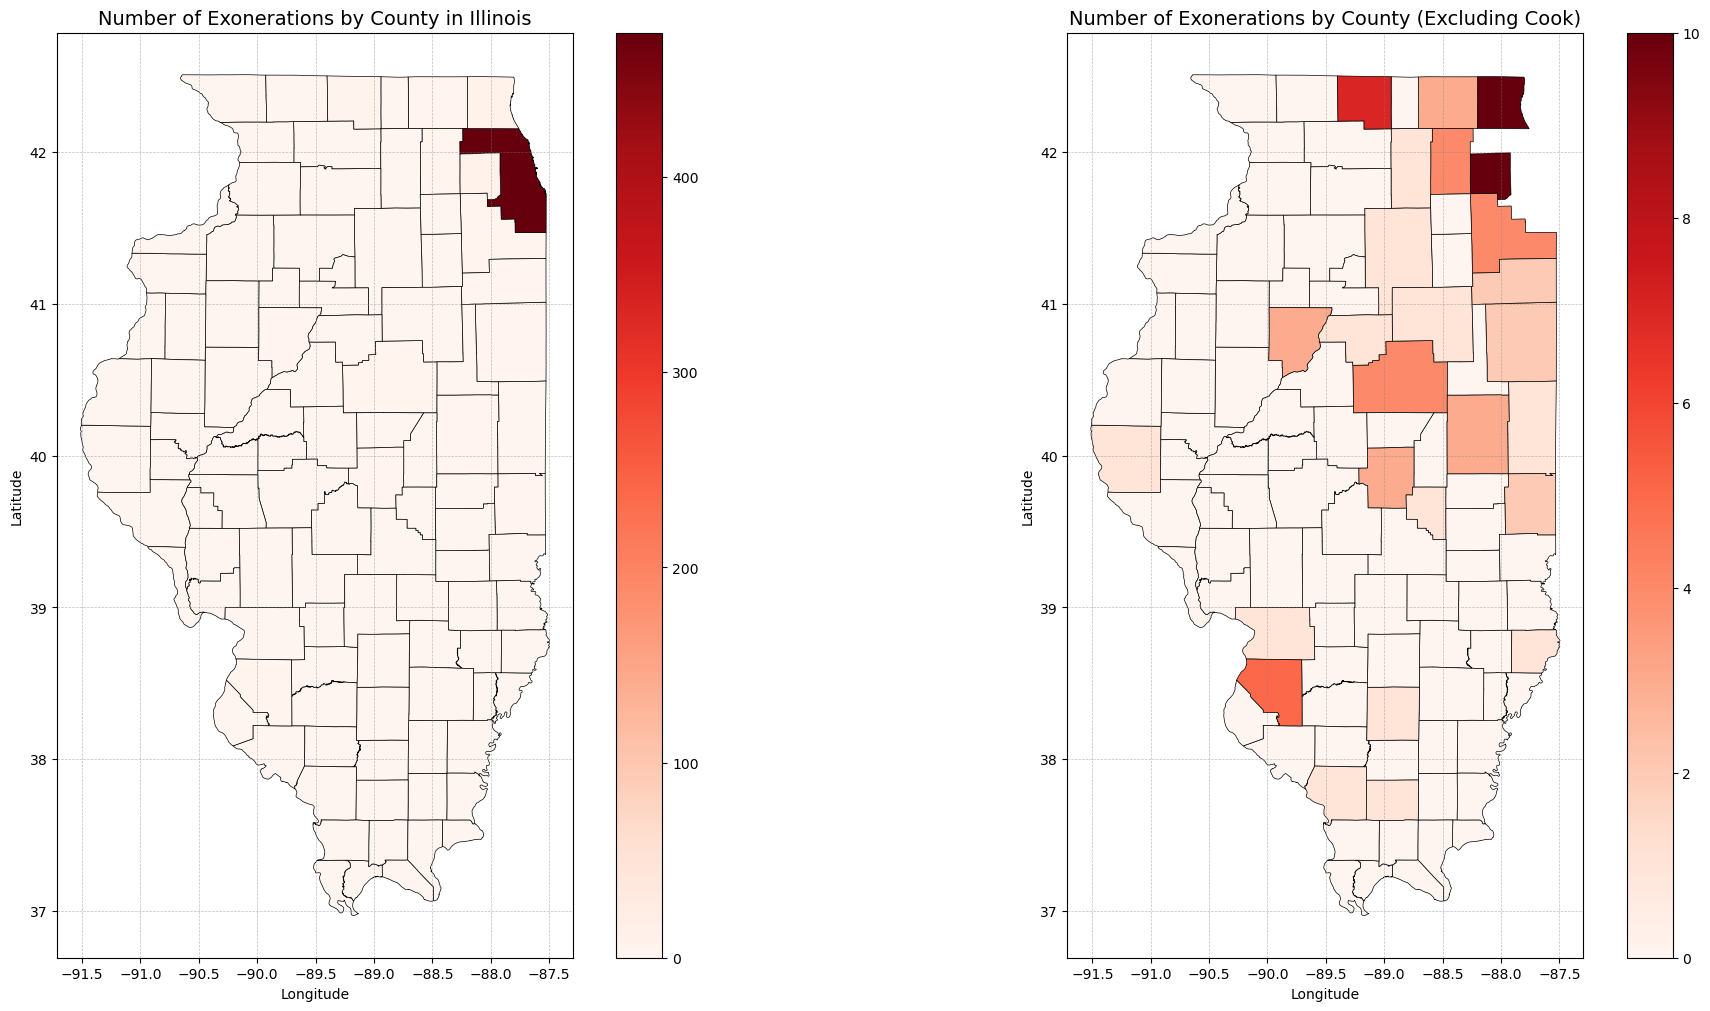

In [182]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the shapefile and prepare it
illinois_counties = gpd.read_file('../../data/geospatial/IL_BNDY_COUNTY_Py.shp')
illinois_counties['county'] = illinois_counties['COUNTY_NAM'].str.title()  # Match casing

# Merge exoneration data with shapefile
merged_counties = illinois_counties.merge(exoneration_counts, on='county', how='left')

# Replace NaN values with 0 for counties without exonerations
merged_counties['num_exonerations'] = merged_counties['num_exonerations'].fillna(0)

# Filter out Cook County (outlier)
filtered_counties = merged_counties[merged_counties['county'] != 'Cook']

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

# Plot the gradient map with all counties
merged_counties.plot(
    column='num_exonerations',
    cmap='Reds',
    linewidth=0.5,
    edgecolor='black',
    ax=axes[0],
    legend=True
)
axes[0].set_title("Number of Exonerations by County in Illinois", fontsize=14)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Plot the gradient map excluding Cook County
filtered_counties.plot(
    column='num_exonerations',
    cmap='Reds',
    linewidth=0.5,
    edgecolor='black',
    ax=axes[1],
    legend=True
)
axes[1].set_title("Number of Exonerations by County (Excluding Cook)", fontsize=14)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()


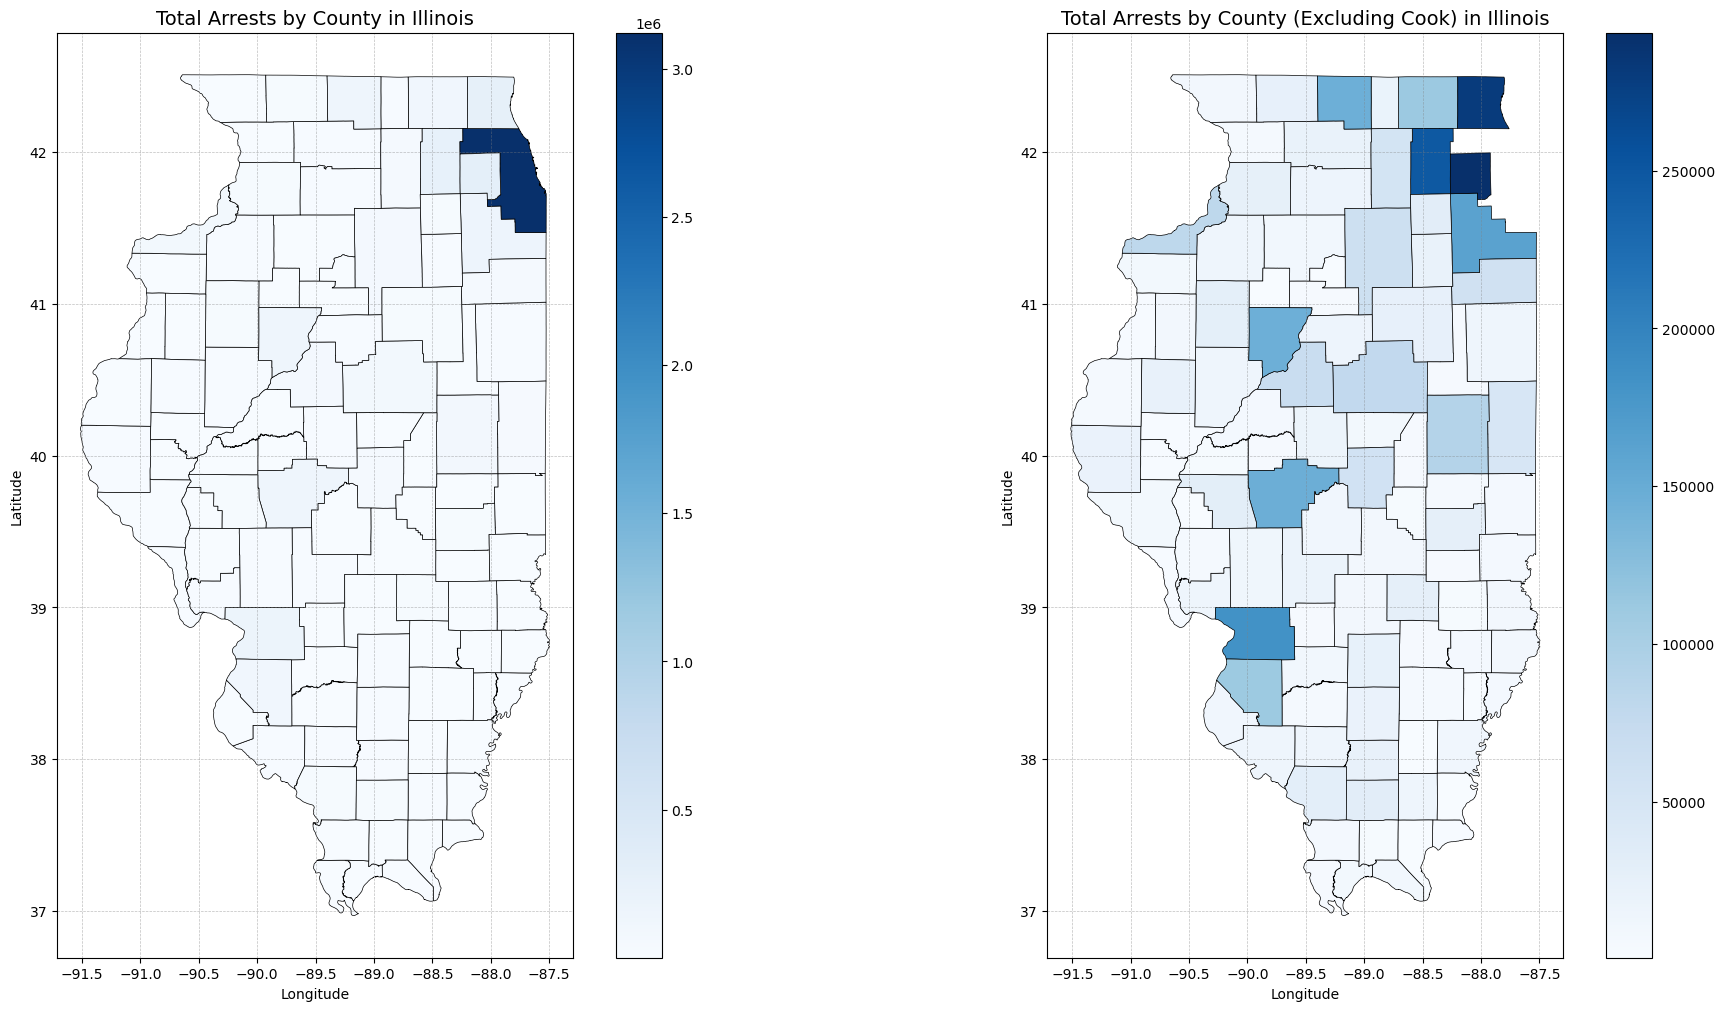

In [183]:
aggregated_data = pd.read_csv('../../data/processed-data/aggregated_arrests_2001_to_2021.csv')
aggregated_data_melted = aggregated_data.melt(id_vars='race', var_name='county', value_name='total_arrests')

# Aggregate total arrests by county for all races
total_arrests_by_county = aggregated_data_melted.groupby('county')['total_arrests'].sum().reset_index()

# Ensure county names are consistent
total_arrests_by_county['county'] = total_arrests_by_county['county'].str.strip().str.title()
illinois_counties['county'] = illinois_counties['county'].str.strip().str.title()

# Merge total arrests data with the shapefile
merged_total_arrests = illinois_counties.merge(
    total_arrests_by_county,
    on='county',
    how='left'
)

# Fill NaN values with 0 for counties without data
merged_total_arrests['total_arrests'] = merged_total_arrests['total_arrests'].fillna(0)

# Filter out Cook County
filtered_total_arrests = merged_total_arrests[merged_total_arrests['county'] != 'Cook']

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

# Plot the gradient map for total arrests by county (including all counties)
merged_total_arrests.plot(
    column='total_arrests',
    cmap='Blues',  #
    linewidth=0.5,
    edgecolor='black',
    ax=axes[0],
    legend=True
)
axes[0].set_title("Total Arrests by County in Illinois", fontsize=14)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Plot the gradient map excluding Cook County
filtered_total_arrests.plot(
    column='total_arrests',
    cmap='Blues', 
    linewidth=0.5,
    edgecolor='black',
    ax=axes[1],
    legend=True
)
axes[1].set_title("Total Arrests by County (Excluding Cook) in Illinois", fontsize=14)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the side-by-side maps
plt.show()


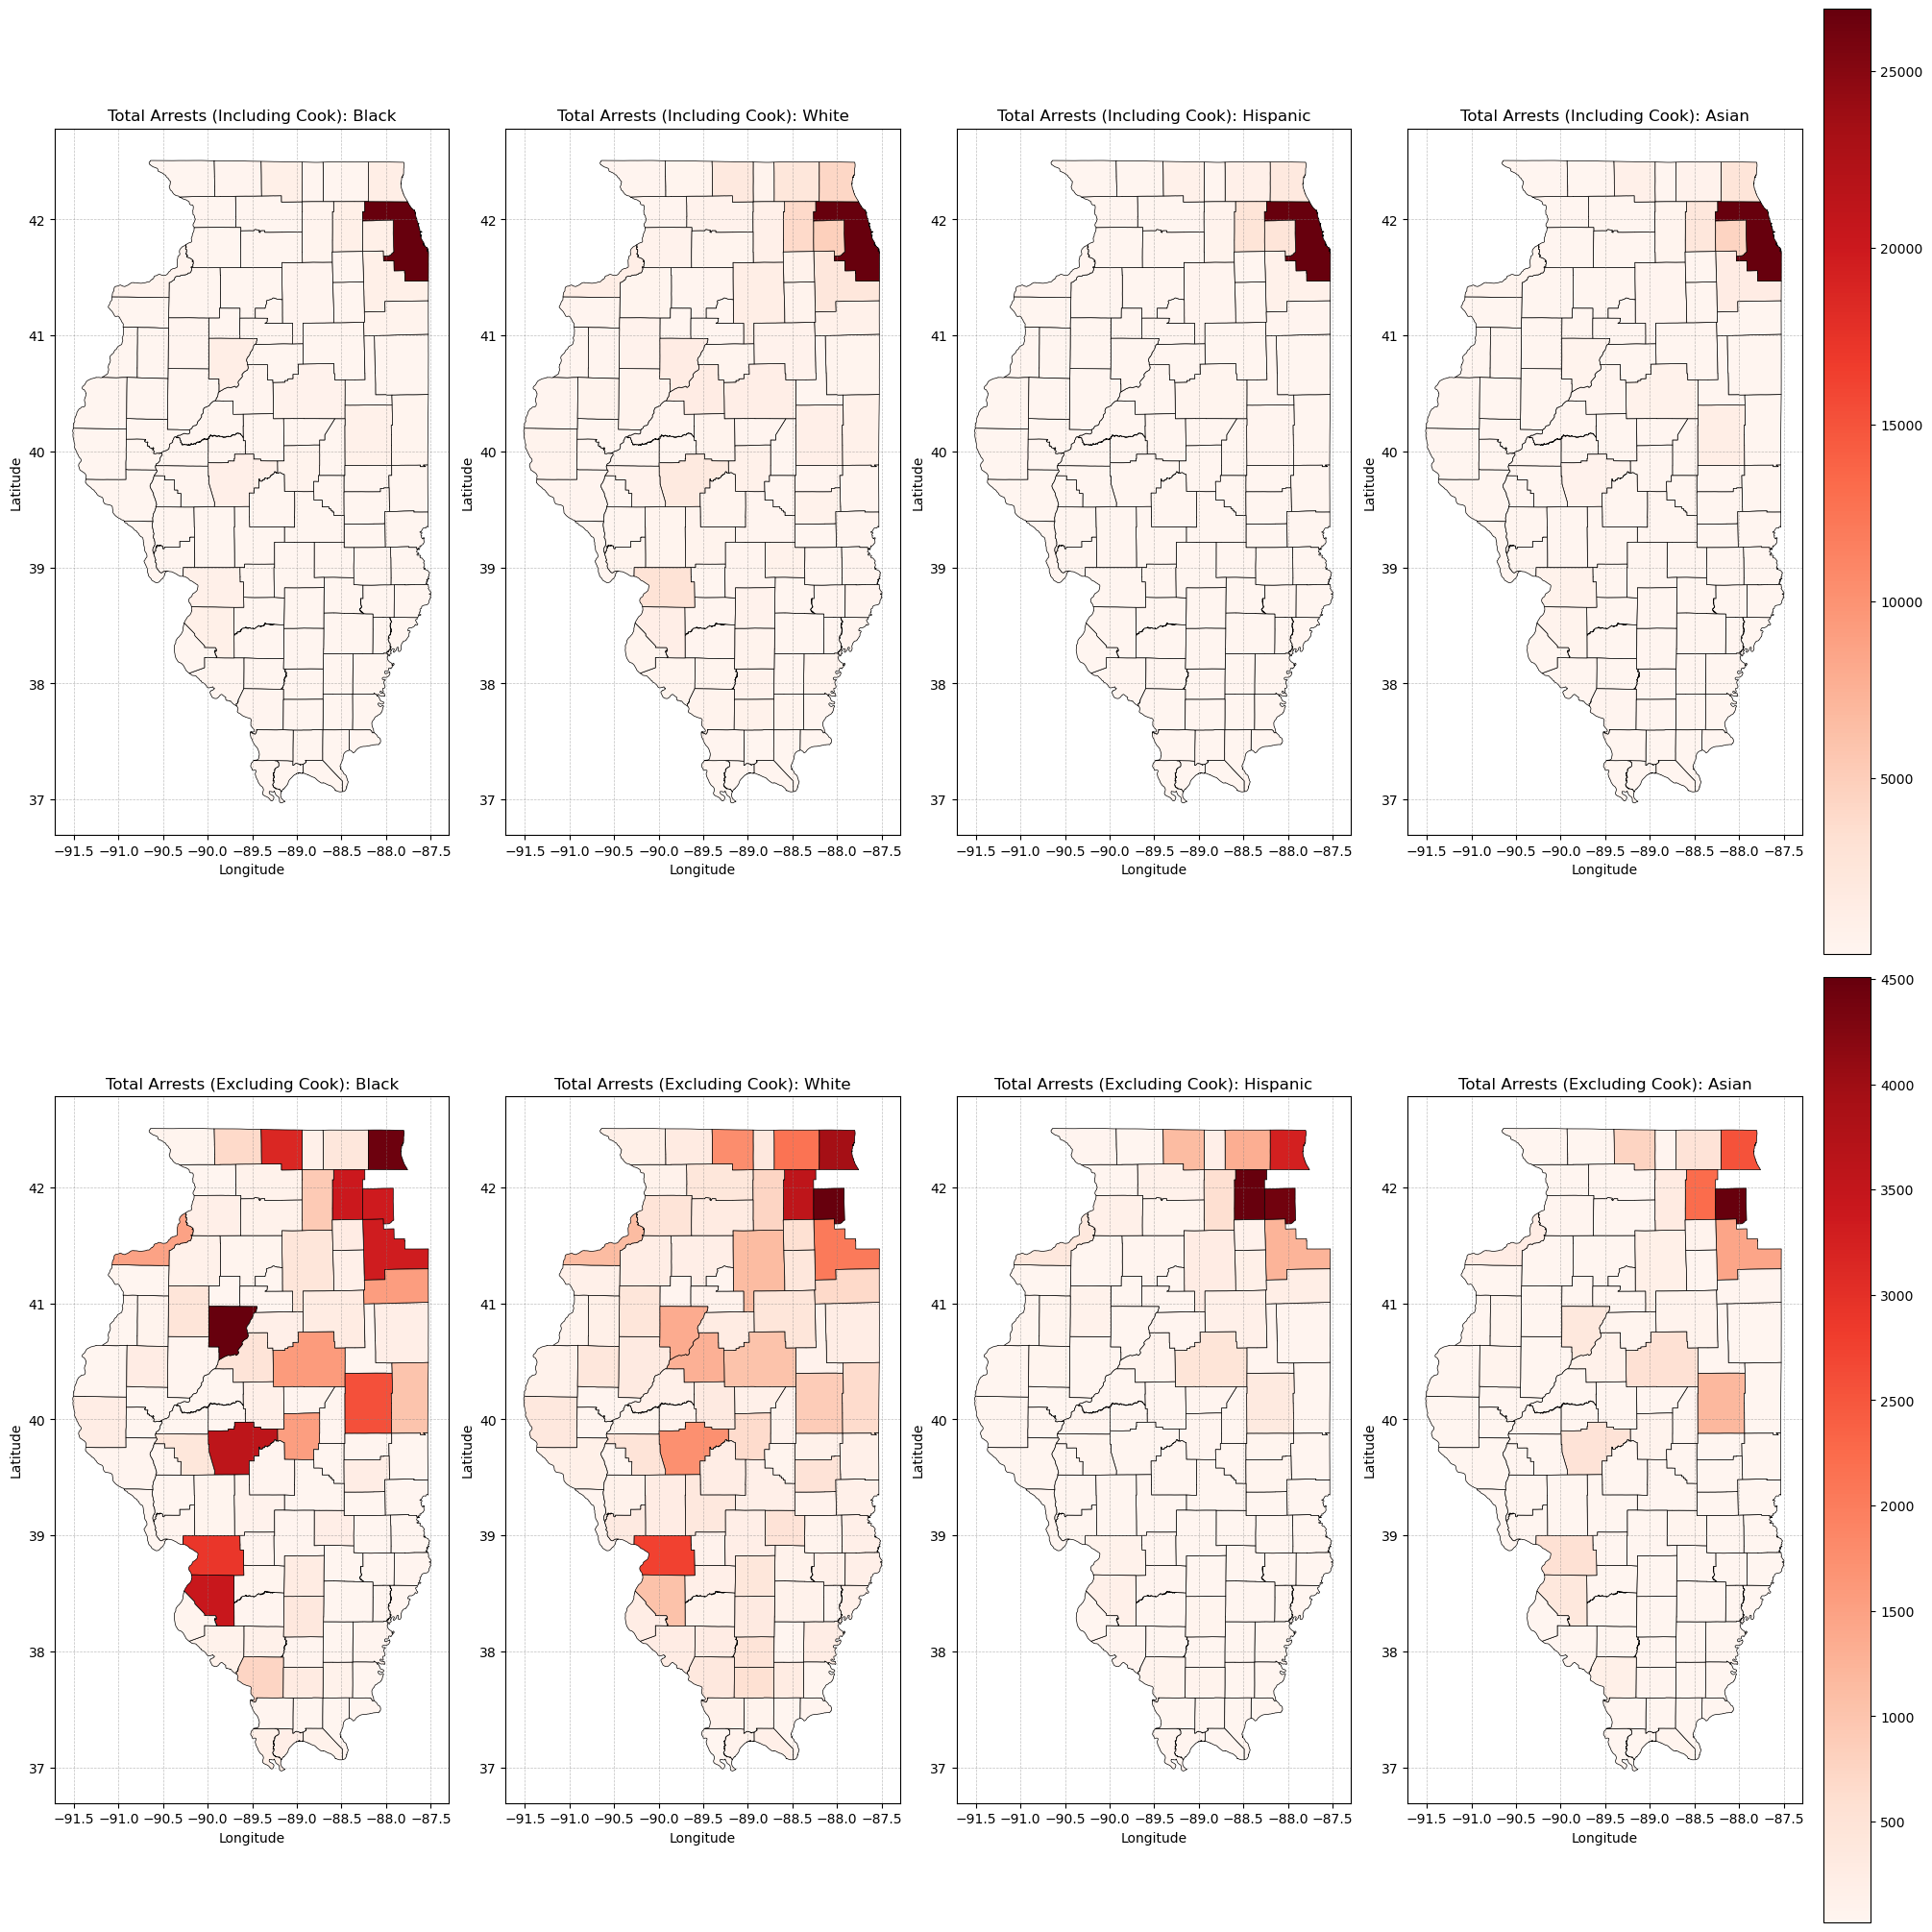

In [184]:
# Define the races to plot
races_to_plot = ["Black", "White", "Hispanic", "Asian"]

# Filter out Cook County
merged_data_excluding_cook = merged_data[merged_data['county'] != 'Cook']

# Create subplots
fig, axes = plt.subplots(2, len(races_to_plot), figsize=(20, 20), constrained_layout=True)

# Plot each race's data (including Cook County) on the first row
for i, race in enumerate(races_to_plot):
    race_data = merged_data[merged_data['race'] == race]

    # Ensure data is not empty
    if race_data.empty:
        print(f"No data available for the selected race: {race}")
        continue

    # Plot the gradient map for the current race
    race_data.plot(
        column='total_arrests',
        cmap='Reds',
        linewidth=0.5,
        edgecolor='black',
        ax=axes[0, i],
        legend=(i == len(races_to_plot) - 1)  # Show legend only on the last subplot
    )
    axes[0, i].set_title(f"Total Arrests (Including Cook): {race}")
    axes[0, i].set_xlabel("Longitude")
    axes[0, i].set_ylabel("Latitude")
    axes[0, i].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Plot each race's data (excluding Cook County) on the second row
for i, race in enumerate(races_to_plot):
    race_data = merged_data_excluding_cook[merged_data_excluding_cook['race'] == race]

    # Ensure data is not empty
    if race_data.empty:
        print(f"No data available for the selected race: {race}")
        continue

    # Plot the gradient map for the current race
    race_data.plot(
        column='total_arrests',
        cmap='Reds',
        linewidth=0.5,
        edgecolor='black',
        ax=axes[1, i],
        legend=(i == len(races_to_plot) - 1)  # Show legend only on the last subplot
    )
    axes[1, i].set_title(f"Total Arrests (Excluding Cook): {race}")
    axes[1, i].set_xlabel("Longitude")
    axes[1, i].set_ylabel("Latitude")
    axes[1, i].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the plot
plt.show()


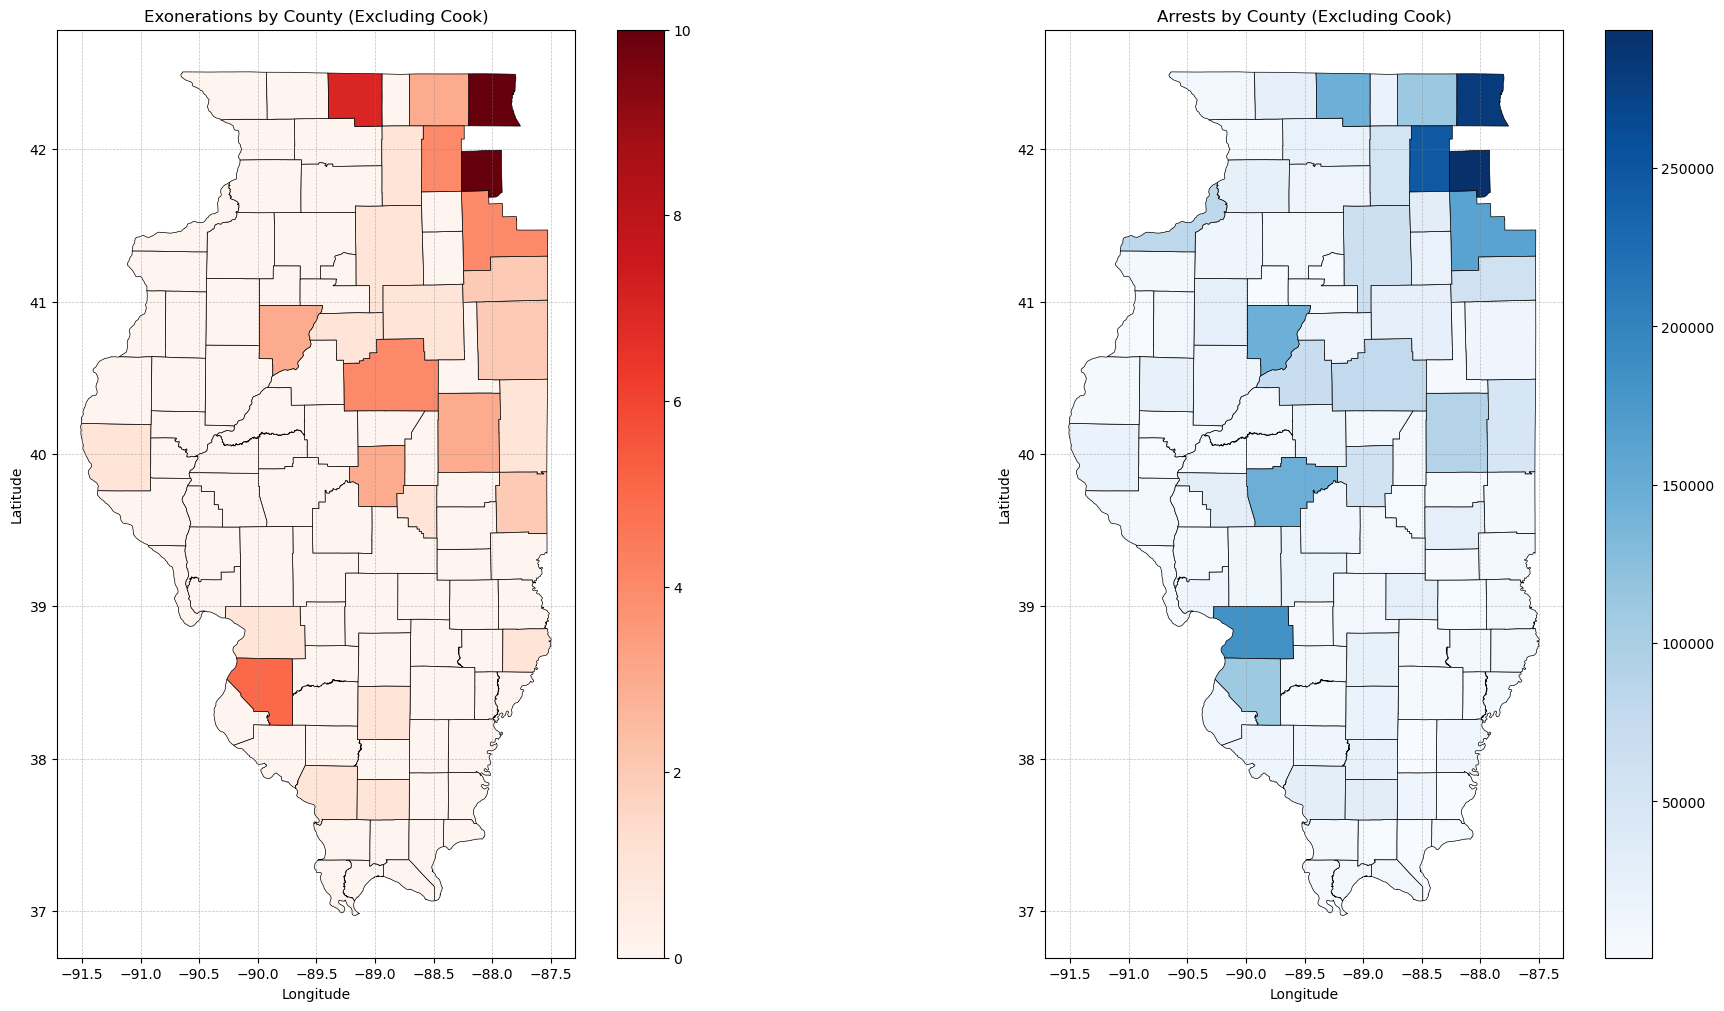

In [185]:
# Merge shapefile with exoneration and arrest datasets
merged_exonerations = illinois_counties.merge(exoneration_counts, on='county', how='left')
merged_exonerations['num_exonerations'] = merged_exonerations['num_exonerations'].fillna(0)

merged_arrests = illinois_counties.merge(total_arrests_by_county, on='county', how='left')
merged_arrests['total_arrests'] = merged_arrests['total_arrests'].fillna(0)

# Filter to exclude Cook County for both datasets
filtered_exonerations = merged_exonerations[merged_exonerations['county'] != 'Cook']
filtered_arrests = merged_arrests[merged_arrests['county'] != 'Cook']

# Create side-by-side plots (Excluding Cook Only)
fig, axes = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

# 1. Exonerations (Excluding Cook)
filtered_exonerations.plot(
    column='num_exonerations',
    cmap='Reds',
    linewidth=0.5,
    edgecolor='black',
    ax=axes[0],
    legend=True
)
axes[0].set_title("Exonerations by County (Excluding Cook)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# 2. Arrests (Excluding Cook)
filtered_arrests.plot(
    column='total_arrests',
    cmap='Blues',
    linewidth=0.5,
    edgecolor='black',
    ax=axes[1],
    legend=True
)
axes[1].set_title("Arrests by County (Excluding Cook)")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the combined plots
plt.show()

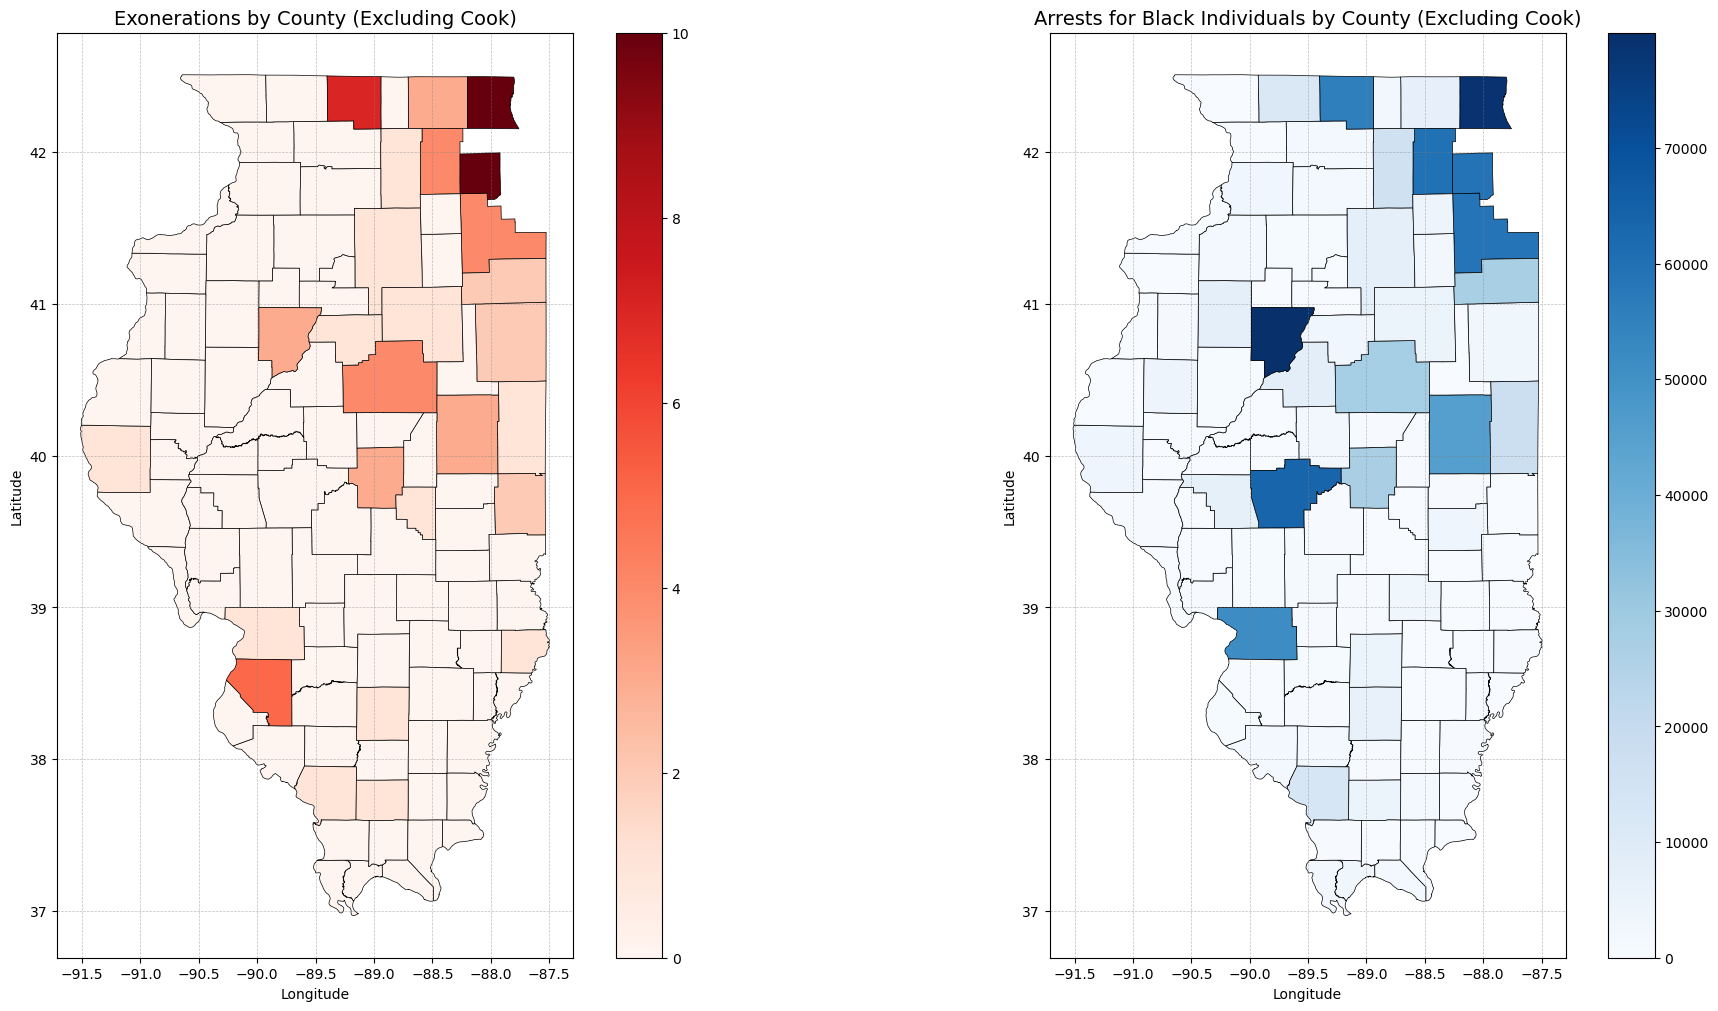

In [186]:
# Filter arrests data for Black individuals only
black_arrests = aggregated_data_melted[aggregated_data_melted['race'] == 'Black']

# Merge shapefile with arrests data (Black only)
merged_black_arrests = illinois_counties.merge(black_arrests, on='county', how='left')
merged_black_arrests['total_arrests'] = merged_black_arrests['total_arrests'].fillna(0)

# Filter to exclude Cook County
filtered_exonerations = merged_exonerations[merged_exonerations['county'] != 'Cook']
filtered_black_arrests = merged_black_arrests[merged_black_arrests['county'] != 'Cook']

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

# 1. Exonerations (Excluding Cook)
filtered_exonerations.plot(
    column='num_exonerations',
    cmap='Reds',
    linewidth=0.5,
    edgecolor='black',
    ax=axes[0],
    legend=True
)
axes[0].set_title("Exonerations by County (Excluding Cook)", fontsize=14)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# 2. Arrests for Black Individuals (Excluding Cook)
filtered_black_arrests.plot(
    column='total_arrests',
    cmap='Blues',
    linewidth=0.5,
    edgecolor='black',
    ax=axes[1],
    legend=True
)
axes[1].set_title("Arrests for Black Individuals by County (Excluding Cook)", fontsize=14)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Show the combined plots
plt.show()

In [187]:
# Display summary statistics
print("Summary statistics:")
print(df.describe(include='all'))

Summary statistics:
       last_name first_name         age   race   sex     state county  \
count        548        548  547.000000    548   548       548    548   
unique       380        332         NaN      5     2         1     27   
top      Johnson    Anthony         NaN  Black  male  Illinois   Cook   
freq          12         14         NaN    418   518       548    474   
mean         NaN        NaN   25.555759    NaN   NaN       NaN    NaN   
std          NaN        NaN    8.557824    NaN   NaN       NaN    NaN   
min          NaN        NaN   13.000000    NaN   NaN       NaN    NaN   
25%          NaN        NaN   19.000000    NaN   NaN       NaN    NaN   
50%          NaN        NaN   23.000000    NaN   NaN       NaN    NaN   
75%          NaN        NaN   30.000000    NaN   NaN       NaN    NaN   
max          NaN        NaN   57.000000    NaN   NaN       NaN    NaN   

          latitude   longitude worst_crime_display   sentence  \
count   548.000000  548.000000        

In [188]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

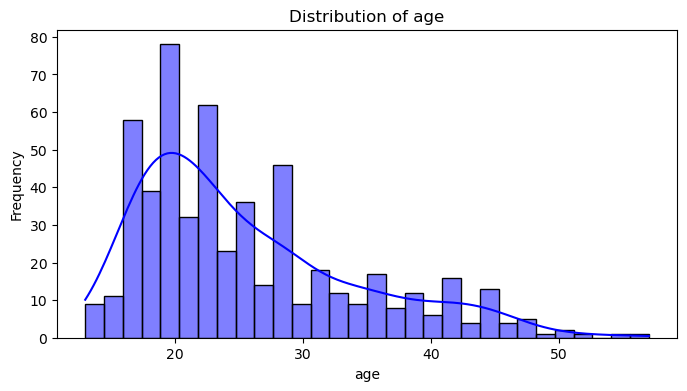

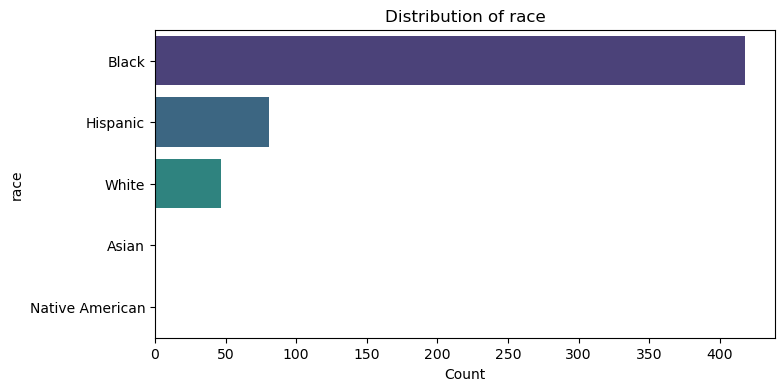

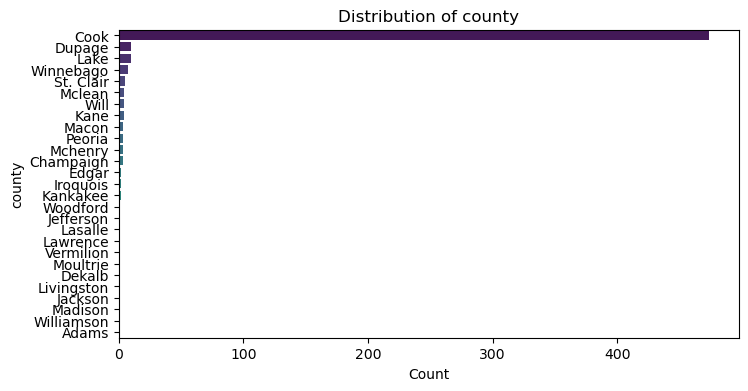

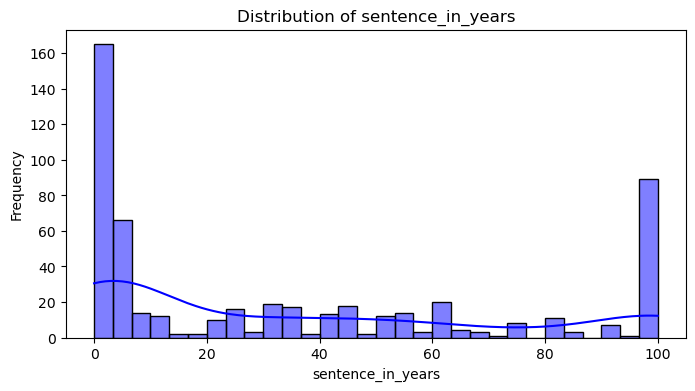

In [189]:
# Define the specific columns to visualize
columns_to_plot = ['age', 'race', 'county', 'sentence_in_years']

# Create histograms for the numeric or categorical distributions
for col in columns_to_plot:
    if col in df.columns:  # Ensure the column exists
        plt.figure(figsize=(8, 4))
        
        # Check if the column is numeric or categorical
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col], kde=True, bins=30, color='blue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        else:
            sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
        
        plt.show()
    else:
        print(f"Column '{col}' does not exist in the dataset.")


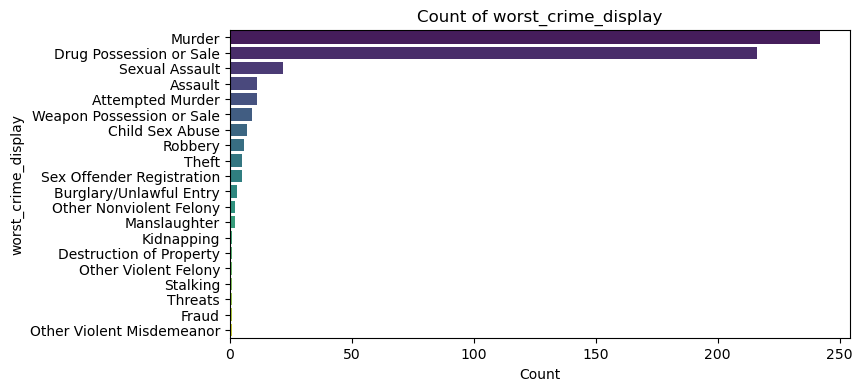

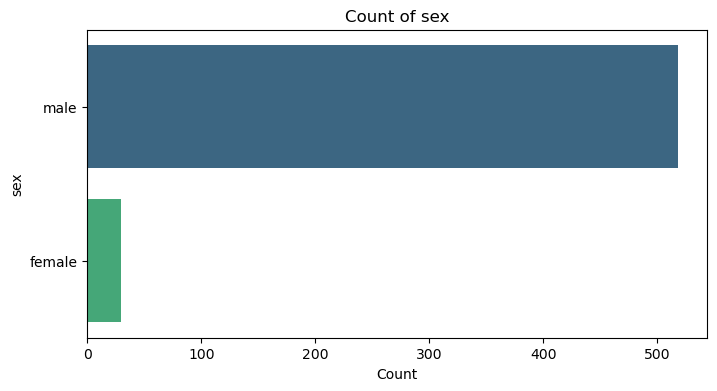

In [190]:
# Define the columns for counts
columns_to_count = ['worst_crime_display', 'sex']

# Generate count plots for these columns
for col in columns_to_count:
    if col in df.columns:  # Ensure the column exists
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Count of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()
    else:
        print(f"Column '{col}' does not exist in the dataset.")

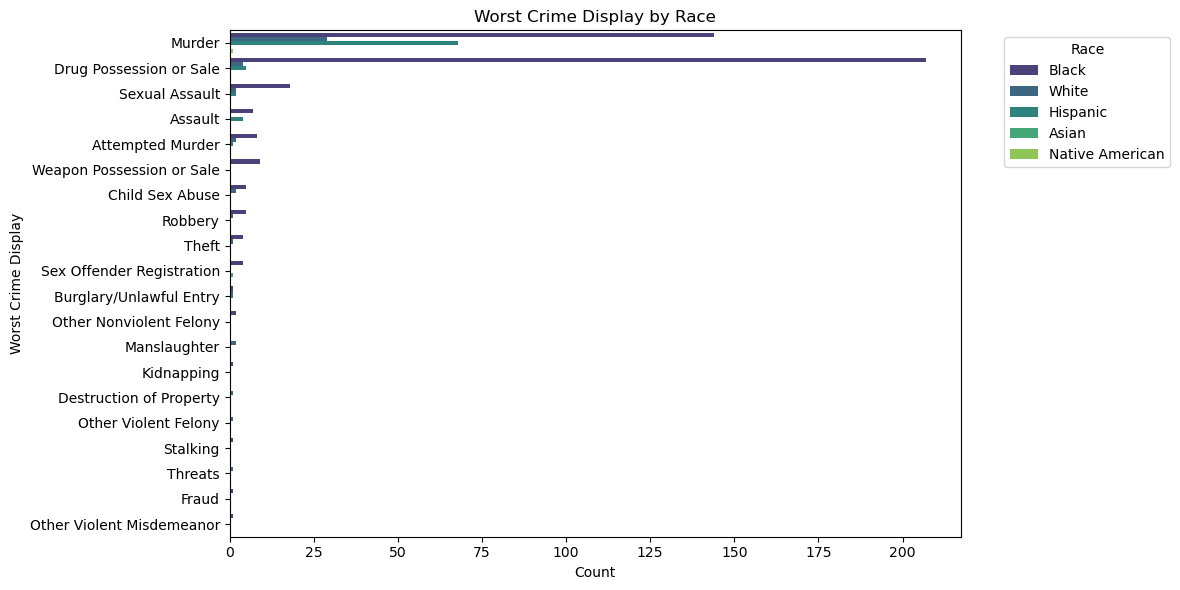

In [191]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='worst_crime_display',
    hue='race',
    order=df['worst_crime_display'].value_counts().index,
    palette='viridis'
)
plt.title('Worst Crime Display by Race')
plt.xlabel('Count')
plt.ylabel('Worst Crime Display')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


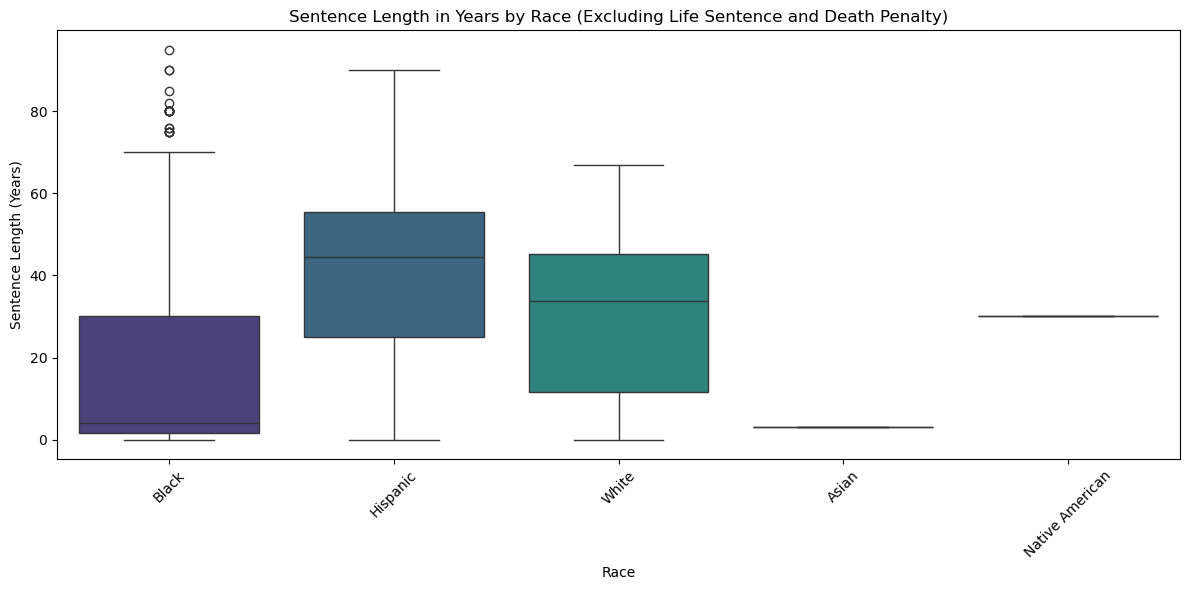

In [192]:
# Drop rows where sentence_in_years equals 100 -> life sentence and death penalty
df_filtered = df[df['sentence_in_years'] != 100]

# Plot Sentence in Years by Race
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='race', y='sentence_in_years', palette='viridis')
plt.title('Sentence Length in Years by Race (Excluding Life Sentence and Death Penalty)')
plt.xlabel('Race')
plt.ylabel('Sentence Length (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\court\AppData\Local\Temp\ipykernel_6756\1186036694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['normalized_sentence_length'] = (


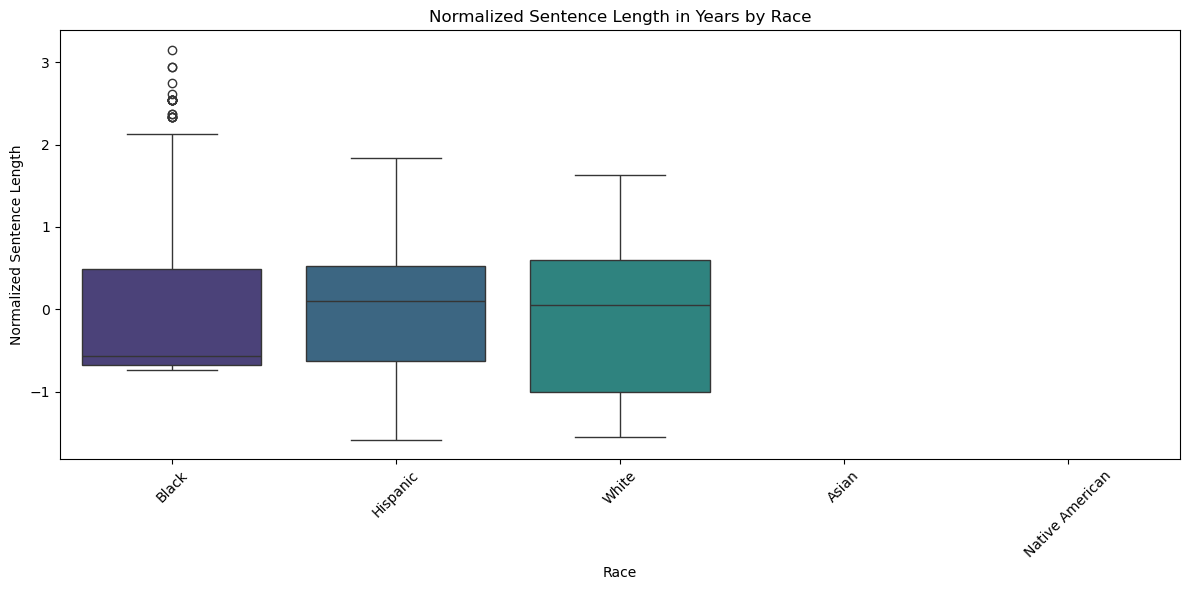

In [193]:
# Calculate sample size per race
race_counts = df_filtered['race'].value_counts()

#   Z-Score normalization
df_filtered['normalized_sentence_length'] = (
    df_filtered.groupby('race')['sentence_in_years']
    .transform(lambda x: (x - x.mean()) / x.std())
)

# Plot the normalized sentence lengths
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='race', y='normalized_sentence_length', palette='viridis')
plt.title('Normalized Sentence Length in Years by Race')
plt.xlabel('Race')
plt.ylabel('Normalized Sentence Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


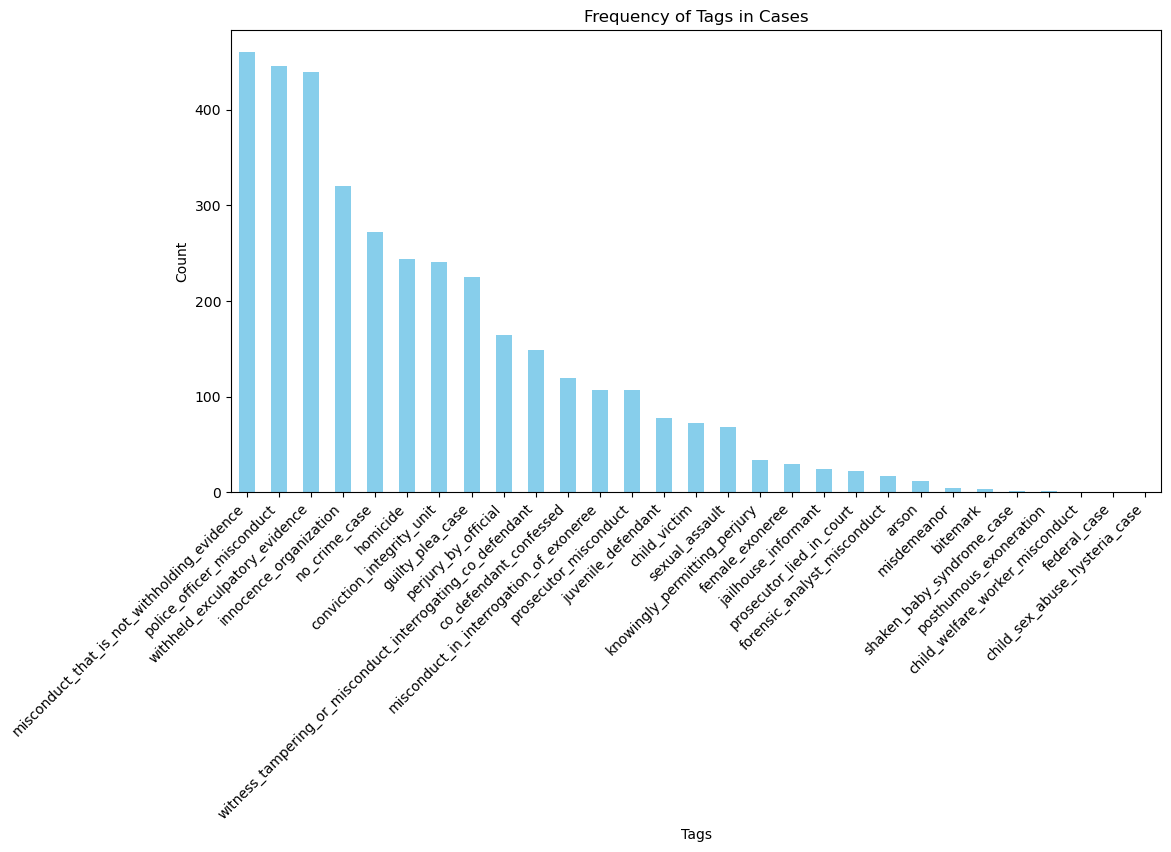

In [194]:
# Count the frequency of each tag
tag_columns = [
    'arson', 'bitemark', 'co_defendant_confessed', 'conviction_integrity_unit',
    'child_sex_abuse_hysteria_case', 'child_victim', 'female_exoneree', 
    'federal_case', 'homicide', 'innocence_organization', 'jailhouse_informant', 
    'juvenile_defendant', 'misdemeanor', 'no_crime_case', 'guilty_plea_case', 
    'posthumous_exoneration', 'sexual_assault', 'shaken_baby_syndrome_case',
    'prosecutor_misconduct', 'police_officer_misconduct', 'forensic_analyst_misconduct', 
    'child_welfare_worker_misconduct', 'withheld_exculpatory_evidence',
    'misconduct_that_is_not_withholding_evidence', 'knowingly_permitting_perjury', 
    'witness_tampering_or_misconduct_interrogating_co_defendant',
    'misconduct_in_interrogation_of_exoneree', 'perjury_by_official', 
    'prosecutor_lied_in_court'
]

# Count occurrences of each tag
tag_counts = df[tag_columns].sum().sort_values(ascending=False)
tag_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Frequency of Tags in Cases")
plt.ylabel("Count")
plt.xlabel("Tags")
plt.xticks(rotation=45, ha='right')
plt.show()


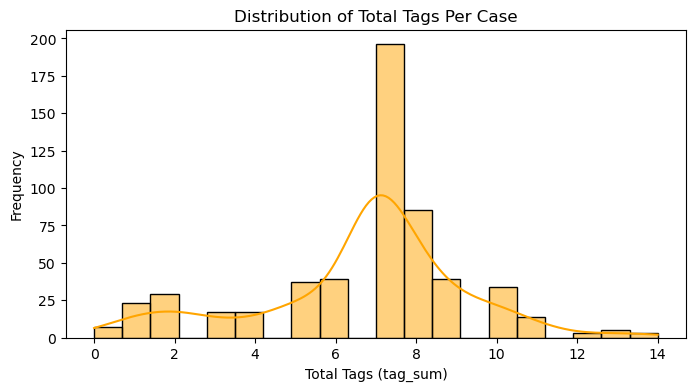

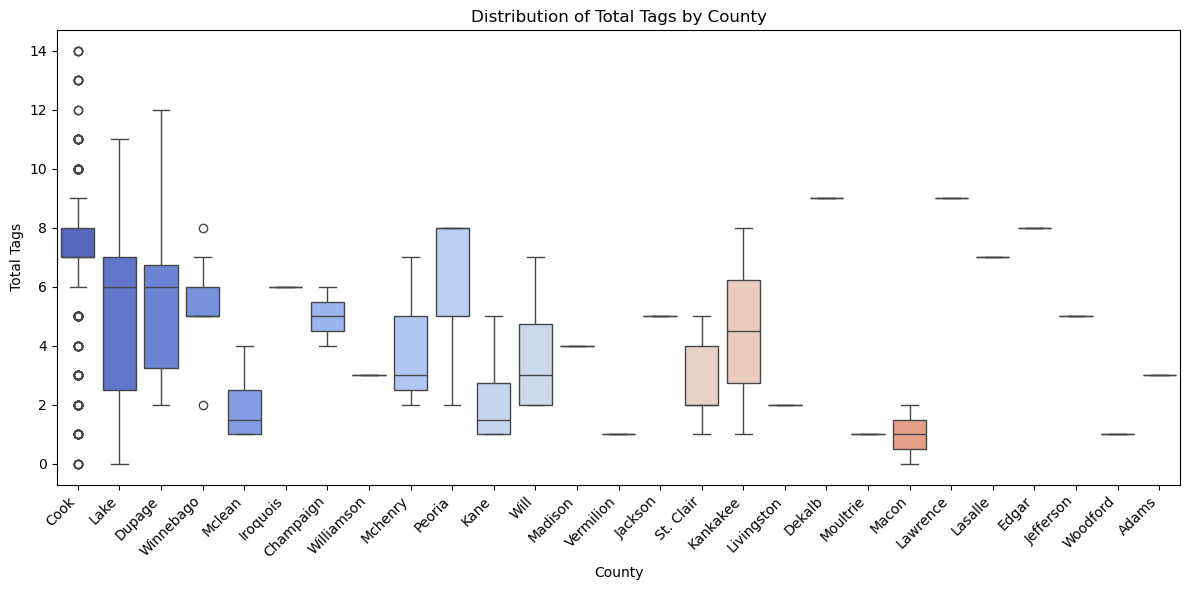

In [205]:
# Distribution of tag_sum
plt.figure(figsize=(8, 4))
sns.histplot(df['tag_sum'], kde=True, bins=20, color='orange')
plt.title("Distribution of Total Tags Per Case")
plt.xlabel("Total Tags (tag_sum)")
plt.ylabel("Frequency")
plt.show()

# Tag sum by county
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='county', y='tag_sum', palette='coolwarm')
plt.title("Distribution of Total Tags by County")
plt.xlabel("County")
plt.ylabel("Total Tags")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


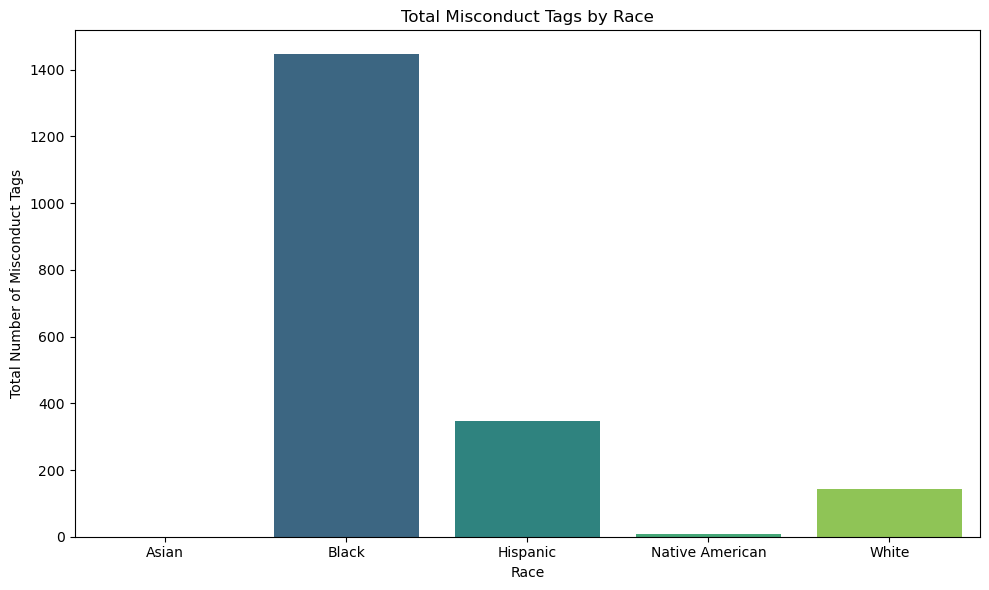

In [200]:
# Group misconduct-related tags
misconduct_tags = [
    'prosecutor_misconduct', 'police_officer_misconduct', 
    'forensic_analyst_misconduct', 'child_welfare_worker_misconduct',
    'withheld_exculpatory_evidence', 'misconduct_that_is_not_withholding_evidence',
    'knowingly_permitting_perjury', 'witness_tampering_or_misconduct_interrogating_co_defendant',
    'misconduct_in_interrogation_of_exoneree', 'perjury_by_official', 
    'prosecutor_lied_in_court'
]

# Create a column for combined misconduct
df['total_misconduct'] = df[misconduct_tags].sum(axis=1)

# Aggregate total misconduct by race (using sum for total counts)
race_misconduct = df.groupby('race')['total_misconduct'].sum().reset_index()

# Bar plot of total misconduct by race
plt.figure(figsize=(10, 6))
sns.barplot(data=race_misconduct, x='race', y='total_misconduct', palette='viridis')
plt.title("Total Misconduct Tags by Race")
plt.xlabel("Race")
plt.ylabel("Total Number of Misconduct Tags")
plt.tight_layout()
plt.show()



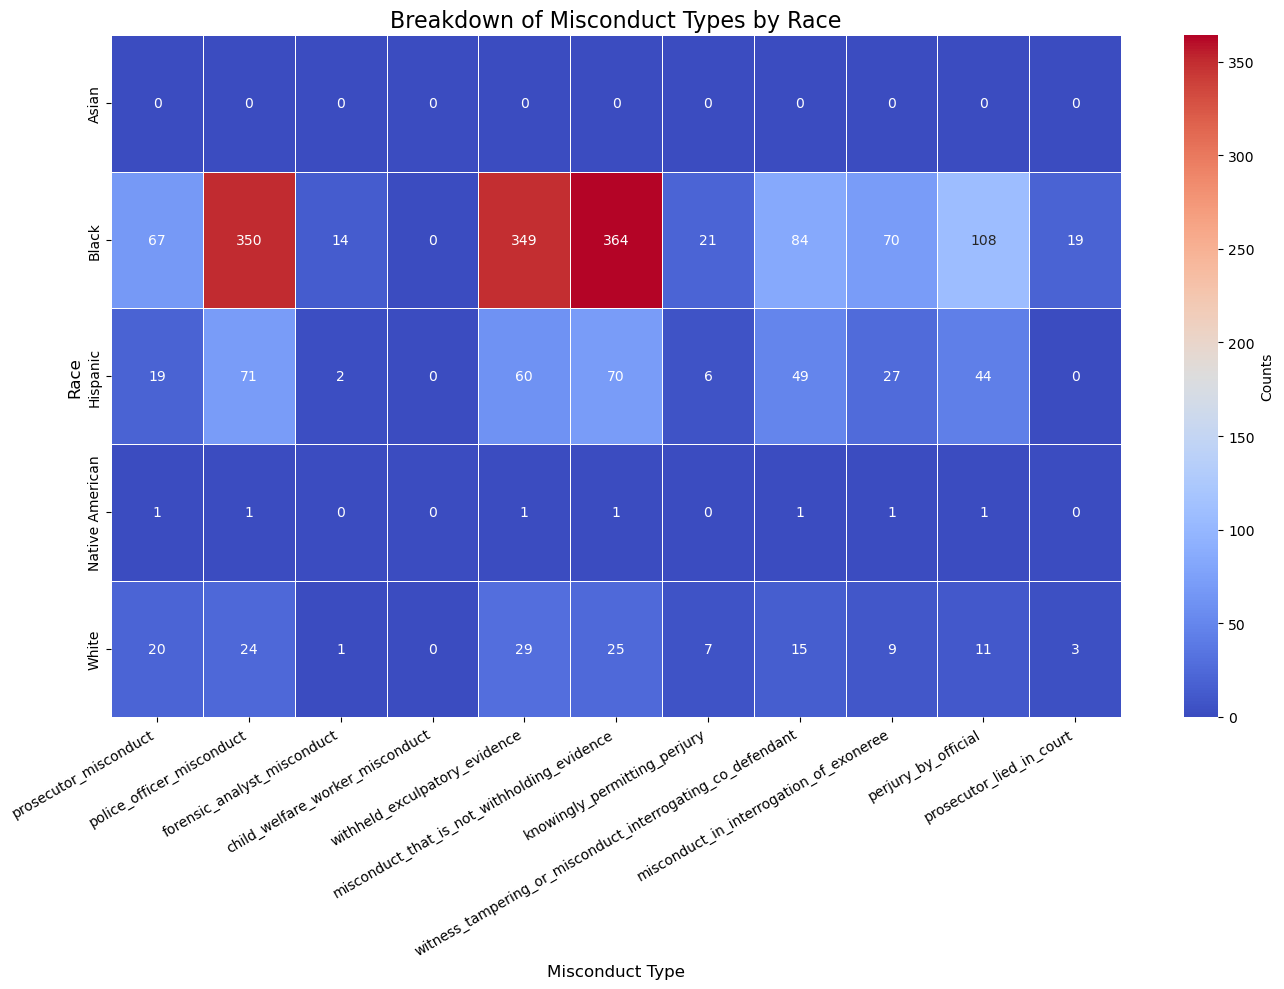

In [206]:
# Aggregate each misconduct tag by race
misconduct_by_race = df.groupby('race')[misconduct_tags].sum()

# Heatmap of misconduct types by race with improved layout
plt.figure(figsize=(14, 10))  # Adjust figure size for better spacing
sns.heatmap(
    misconduct_by_race, 
    annot=True, 
    cmap='coolwarm', 
    fmt='d', 
    linewidths=0.5, 
    cbar_kws={'label': 'Counts'},  # Add a color bar label
    xticklabels=True, 
    yticklabels=True
)
plt.title("Breakdown of Misconduct Types by Race", fontsize=16)  # Larger title font size
plt.xlabel("Misconduct Type", fontsize=12)  # Larger x-axis label font size
plt.ylabel("Race", fontsize=12)  # Larger y-axis label font size
plt.xticks(rotation=30, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)  # Adjust y-axis label font size
plt.tight_layout()  # Optimize layout to avoid overlap
plt.show()

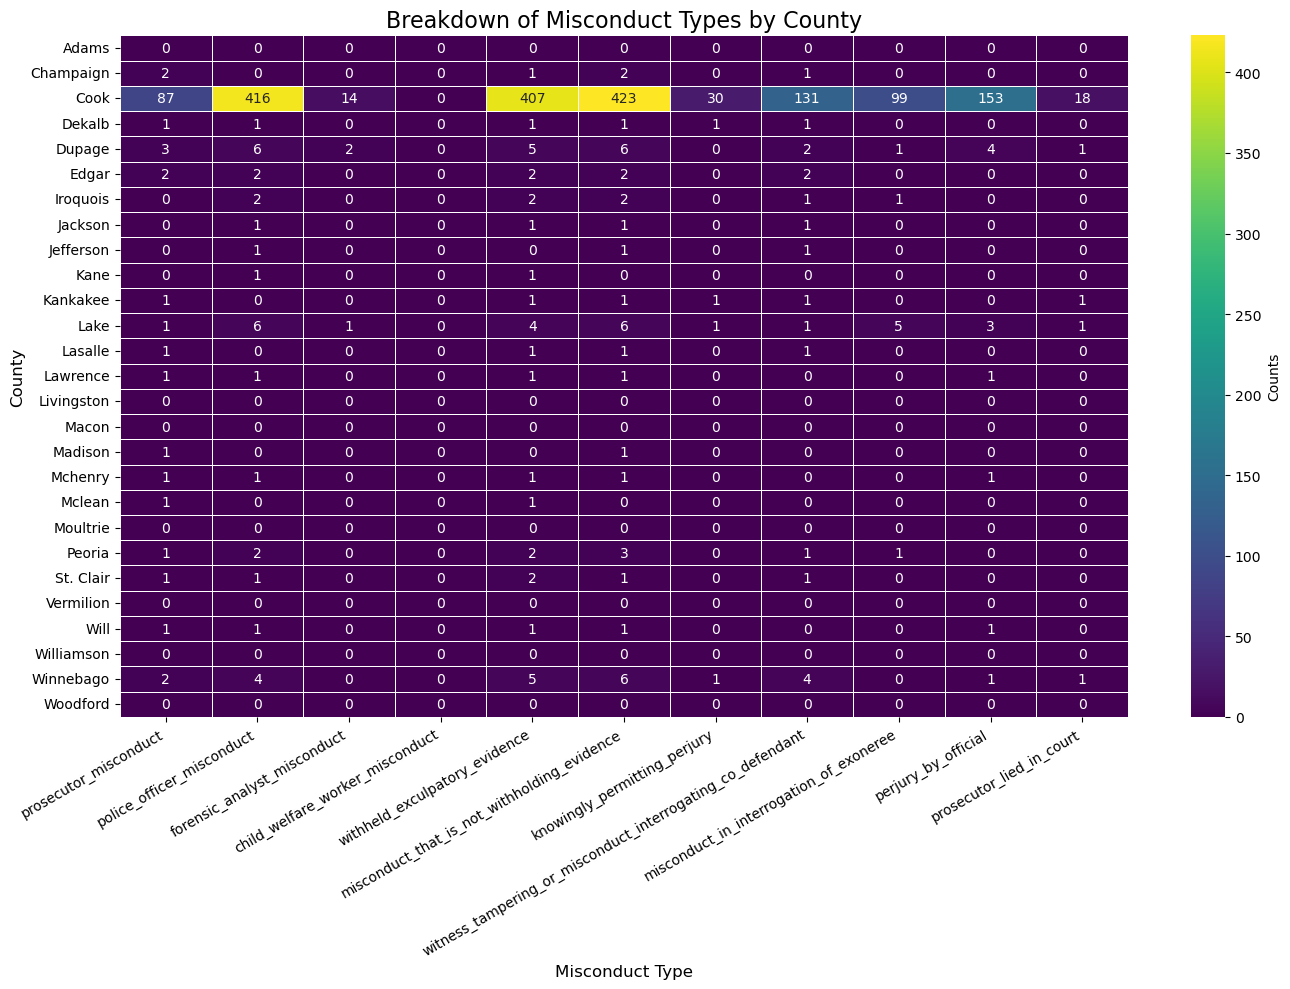

In [209]:
# Aggregate misconduct by county and type
misconduct_county = df.groupby('county')[misconduct_tags].sum()

# Heatmap of misconduct types by county
plt.figure(figsize=(14, 10))
sns.heatmap(
    misconduct_county,
    annot=True,
    cmap='viridis',
    fmt='.0f',  # Format numbers as integers
    linewidths=0.5,
    cbar_kws={'label': 'Counts'}
)
plt.title("Breakdown of Misconduct Types by County", fontsize=16)
plt.xlabel("Misconduct Type", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


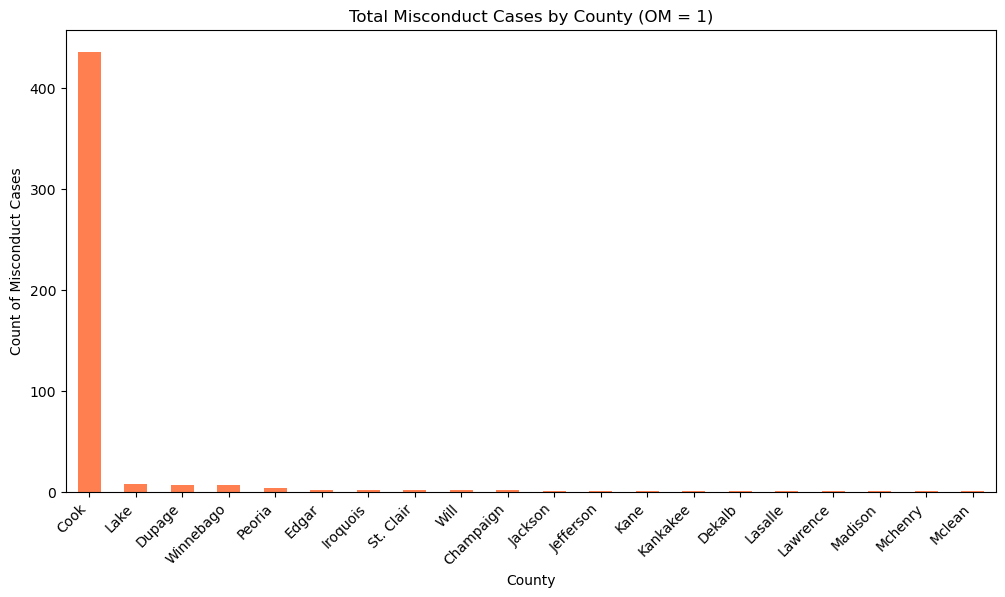

In [201]:
# Filter rows where OM equals 1
df_misconduct = df[df['om'] == 1]

# Misconduct counts by county
county_misconduct = df_misconduct.groupby('county').size().sort_values(ascending=False)

# Bar plot for misconduct by county
county_misconduct.plot(kind='bar', figsize=(12, 6), color='coral')
plt.title("Total Misconduct Cases by County (OM = 1)")
plt.xlabel("County")
plt.ylabel("Count of Misconduct Cases")
plt.xticks(rotation=45, ha='right')
plt.show()


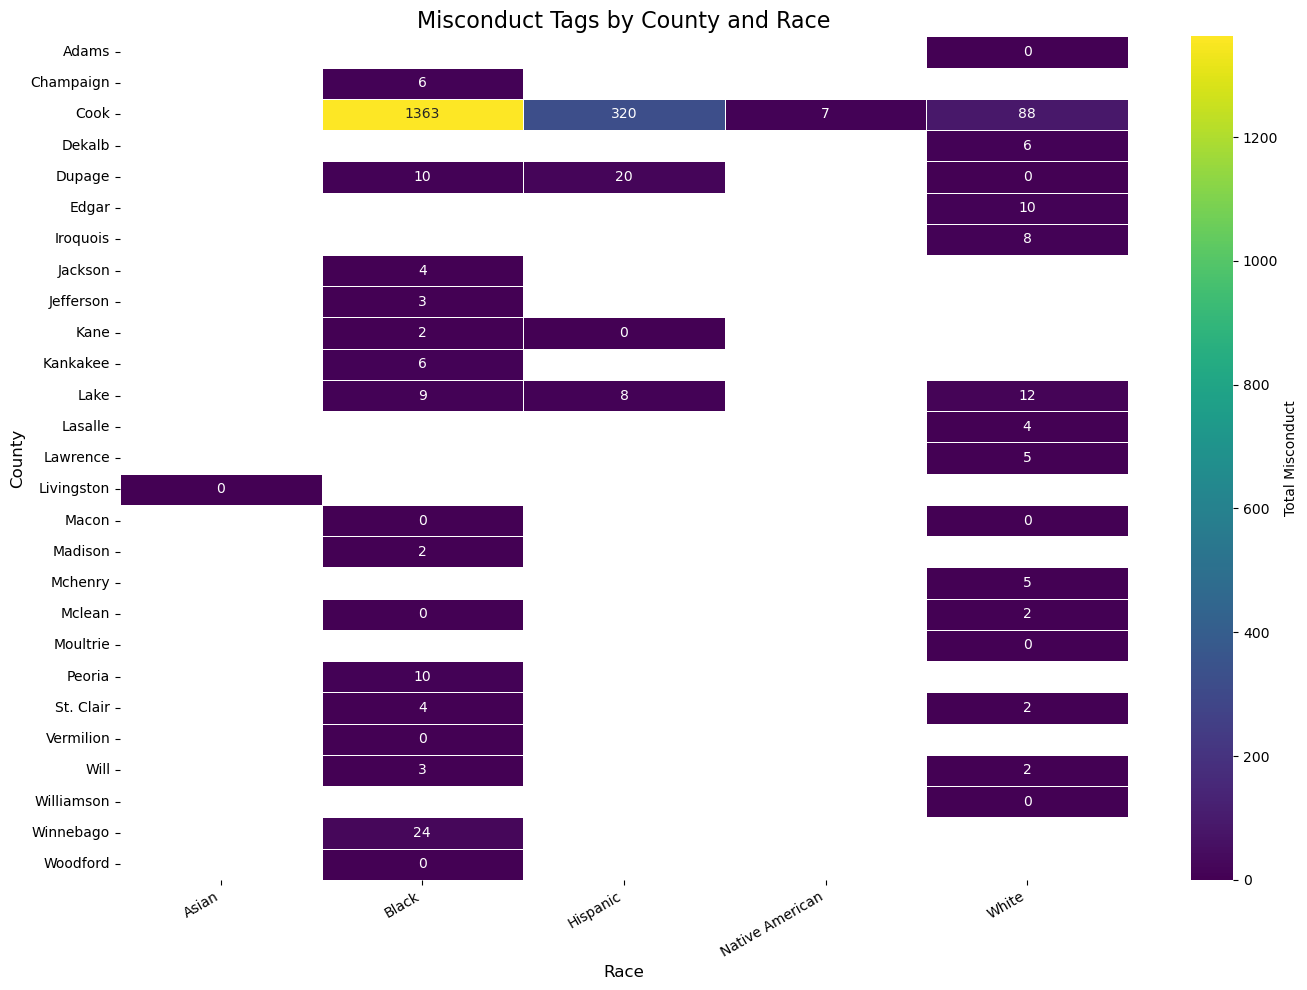

In [211]:
# Aggregate misconduct by county and race
misconduct_race_county = df.groupby(['county', 'race'])['total_misconduct'].sum().unstack()

# Heatmap of misconduct by county and race
plt.figure(figsize=(14, 10))
sns.heatmap(
    misconduct_race_county,
    annot=True,  # Add cell annotations
    cmap='viridis', 
    fmt='.0f',  # Format annotations as integers
    linewidths=0.5,  # Add gridlines
    cbar_kws={'label': 'Total Misconduct'}
)
plt.title("Misconduct Tags by County and Race", fontsize=16)
plt.xlabel("Race", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout for readability
plt.show()
